In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_yes = pd.read_csv('final_lq_yes.csv')
df_no = pd.read_csv('final_lq_no.csv')

In [4]:
df_yes

,Unnamed: 0,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000
1,1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000
2,2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000
3,3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000
4,4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923
...,...,...,...,...,...,...,...,...
5899,5899,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000
5900,5900,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000
5901,5901,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000
5902,5902,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667


In [5]:
df_yes = df_yes.drop(columns=['Unnamed: 0'])

In [6]:
df_yes

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000
1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000
2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000
3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000
4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923
...,...,...,...,...,...,...,...
5899,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000
5900,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000
5901,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000
5902,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667


In [7]:
df_no

,quarter,dong,pop_total,pop_floating,rent_lq,facility_lq
0,20211,중구 명동,2916.333333,8402492,1.473985,33.379347
1,20212,중구 명동,2881.333333,10284398,1.433017,33.581609
2,20213,중구 명동,2860.000000,9011375,1.441853,33.774409
3,20214,중구 명동,2875.000000,11323327,1.473307,33.496073
4,20221,중구 명동,2865.666667,9344018,1.510207,33.522173
...,...,...,...,...,...,...
5973,20232,종로구 종로5.6가동,5427.333333,5466638,2.075068,6.859557
5974,20233,종로구 종로5.6가동,5424.000000,4934033,2.112709,6.856981
5975,20234,종로구 종로5.6가동,5389.666667,5069880,2.162485,6.887674
5976,20241,종로구 종로5.6가동,5353.666667,4692154,2.172895,6.928617


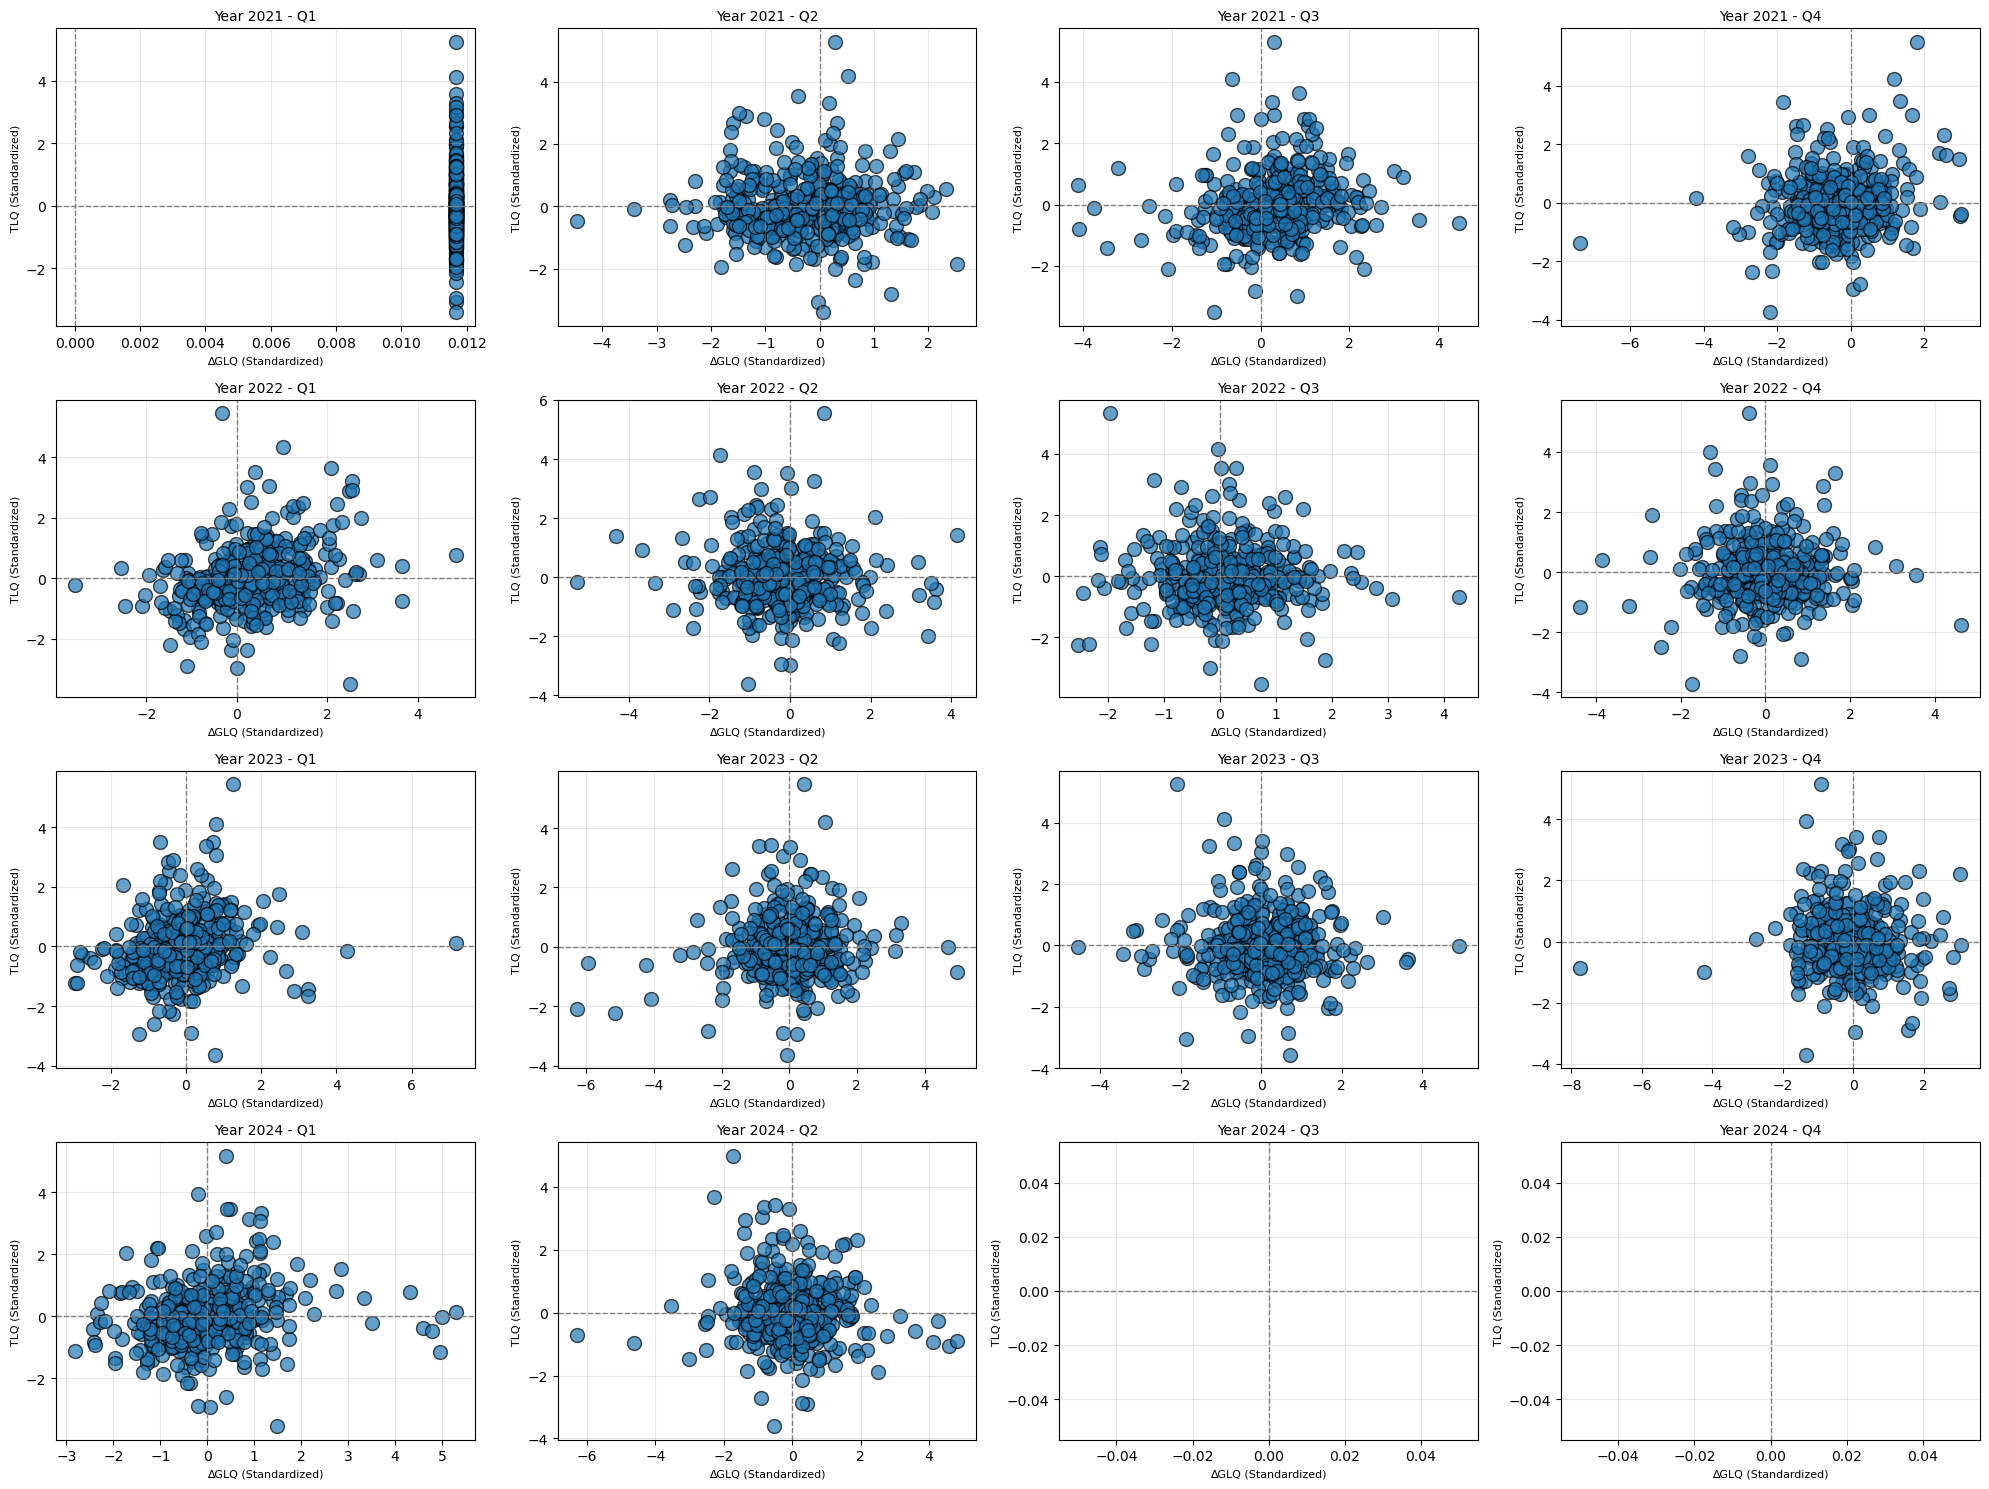

In [10]:
merged_df = pd.merge(df_yes, df_no, on=['dong', 'quarter'], how='inner')

merged_df_sorted = merged_df.sort_values(by=['dong', 'quarter'])

lq_columns = ['food_service_lq', 'retail_lq', 'franchise_lq', 'youth_sales_lq']
for col in lq_columns:
    merged_df_sorted[f'delta_{col}'] = merged_df_sorted.groupby('dong')[col].diff()

delta_columns = [f'delta_{col}' for col in lq_columns]
merged_df_sorted['delta_glq'] = merged_df_sorted[delta_columns].sum(axis=1)

merged_df_sorted['tlq'] = merged_df_sorted[lq_columns].sum(axis=1)

merged_df_sorted['year'] = merged_df_sorted['quarter'] // 10
merged_df_sorted['qtr'] = merged_df_sorted['quarter'] % 10

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_df_sorted[['delta_glq', 'tlq']] = scaler.fit_transform(merged_df_sorted[['delta_glq', 'tlq']])

import matplotlib.pyplot as plt

unique_years = merged_df_sorted['year'].unique()
unique_quarters = merged_df_sorted['qtr'].unique()

plt.figure(figsize=(20, 15))

for i, year in enumerate(sorted(unique_years)):
    for j, qtr in enumerate(sorted(unique_quarters)):
        plt.subplot(len(unique_years), len(unique_quarters), i * len(unique_quarters) + j + 1)
        data = merged_df_sorted[(merged_df_sorted['year'] == year) & (merged_df_sorted['qtr'] == qtr)]
        plt.scatter(data['delta_glq'], data['tlq'], alpha=0.7, edgecolors='k', s=100)
        plt.title(f'Year {year} - Q{qtr}', fontsize=10)
        plt.xlabel('∆GLQ (Standardized)', fontsize=8)
        plt.ylabel('TLQ (Standardized)', fontsize=8)
        plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
        plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
merged_df

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate,pop_total,pop_floating,rent_lq,facility_lq
0,송파구 위례동,20211,0.792873,0.749729,2.219522,1.386906,540.000000,31694.666670,3320137,1.280645,0.476002
1,송파구 위례동,20212,0.823023,0.726397,2.158903,1.543515,310.000000,32231.666670,4081606,1.330059,0.465256
2,송파구 위례동,20213,0.824284,0.724618,2.208791,1.575277,150.000000,34703.666670,4123570,1.278475,0.431378
3,송파구 위례동,20214,0.817079,0.723398,2.043944,1.525161,810.000000,38406.333330,4418806,1.317767,0.388605
4,송파구 위례동,20221,0.819005,0.716322,2.075974,1.434589,23.076923,40988.666670,4050240,1.331280,0.363224
...,...,...,...,...,...,...,...,...,...,...,...
5921,송파구 잠실7동,20233,0.311888,1.259296,0.875081,0.997117,20.000000,9424.666667,1413129,0.700724,0.558434
5922,강남구 개포1동,20234,0.336526,1.338416,0.609471,0.385341,-60.000000,8628.333333,2037706,0.925129,0.771179
5923,강남구 개포1동,20242,0.359586,1.363864,0.433076,1.014300,0.000000,24733.000000,3900072,0.935321,0.268452
5924,송파구 잠실7동,20241,0.295795,1.323843,0.847616,0.761001,-66.666667,9426.000000,1391744,0.712142,0.556873
